In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from collections import deque, namedtuple
from matplotlib import pyplot as plt, patches
import torch
from REACTRL import RealExpEnv, Episode_Memory, Createc_Controller, sac_agent, ReplayMemory, HerReplayMemory, image_process
from REACTRL import plot_graph, show_reset, show_done, show_step
matplotlib.rcParams['image.cmap'] = 'gray'
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
from matplotlib import pyplot as plt, patches
import cv2

cpu


<Figure size 640x480 with 0 Axes>

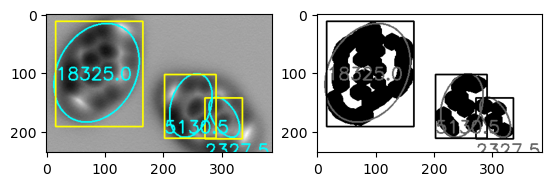

In [8]:
img = cv2.imread('image2.png')
result=image_process(img, kernal_v=7)  # return ell_x, ell_y, ell_wid, ell_len, ell_ang

In [9]:
result

[[304.2522888183594,
  176.12289428710938,
  41.34904098510742,
  76.6598892211914,
  148.66409301757812],
 [247.1179962158203,
  156.91749572753906,
  69.05081176757812,
  112.151123046875,
  17.324426651000977],
 [86.8324966430664,
  100.80287170410156,
  134.1851348876953,
  179.2513427734375,
  29.017208099365234]]

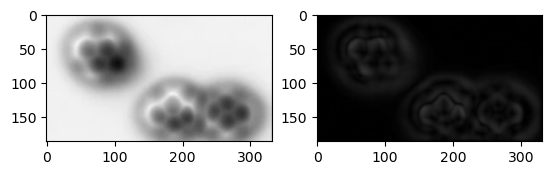

In [22]:
# # Load the image
img = cv2.imread('image3.png')
blur = cv2.GaussianBlur(img, (15, 15), 2)
h, w = img.shape[:2]

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

# Morphological gradient

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closing= cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(closing)

(253.8544158935547, 146.90313720703125) (76.82683563232422, 158.40782165527344) 84.6070556640625
(73.94651794433594, 62.160972595214844) (94.78851318359375, 102.48099517822266) 113.91718292236328


C:\Users\phys-asp-lab\AppData\Local\Temp\ipykernel_42208\1571198301.py:82: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


<Figure size 640x480 with 0 Axes>

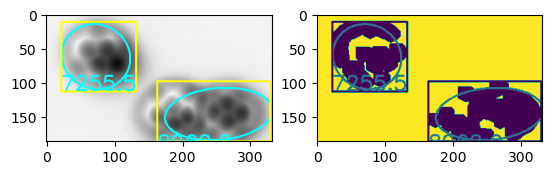

In [38]:
import cv2
import numpy as np
from matplotlib.colors import Normalize

import matplotlib.pyplot as plt

# # Load the image
img = cv2.imread('image3.png')
blur = cv2.GaussianBlur(img, (5, 5), 2)
h, w = img.shape[:2]

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6))
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)


lowerb = np.array([0, 0, 0])
upperb = np.array([15, 15, 15])
binary = cv2.inRange(gradient, lowerb, upperb)

for row in range(h):
    if binary[row, 0] == 255:
        cv2.floodFill(binary, None, (0, row), 0)
    if binary[row, w-1] == 255:
        cv2.floodFill(binary, None, (w-1, row), 0)

for col in range(w):
    if binary[0, col] == 255:
        cv2.floodFill(binary, None, (col, 0), 0)
    if binary[h-1, col] == 255:
        cv2.floodFill(binary, None, (col, h-1), 0)

foreground = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)

# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
background = cv2.dilate(foreground, kernel, iterations=3)
unknown = cv2.subtract(background, foreground)

# Convert the image to grayscale
gray = background

background[background==255] = 5
background[background==0] = 255
background[background==5] = 0

# Apply a threshold to the image to
# separate the objects from the background
ret, thresh = cv2.threshold(
	gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the contours of the objects in the image
contours, hierarchy = cv2.findContours(
	thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and calculate the area of each object

figure=plt.figure()
fig, ax = plt.subplots()
for cnt in contours:
	area = cv2.contourArea(cnt)
	# Draw a bounding box around each
	# object and display the area on the image
	# gray_bg = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)
	x, y, w, h = cv2.boundingRect(cnt)
	xy, width_height, angle = cv2.fitEllipse(cnt)
	print(xy, width_height, angle)
	cv2.ellipse(img, (int(xy[0]), int(xy[1])), (int(width_height[0]/2), int(width_height[1]/2)), angle, 0, 360, (0, 255, 255), 2)
	cv2.ellipse(background, (int(xy[0]), int(xy[1])), (int(width_height[0]/2), int(width_height[1]/2)), angle, 0, 360, (100, 255, 255), 2)
	cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 0), 2)
	cv2.putText(img, str(area), (x, y+100),
				cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

	cv2.rectangle(background, (x, y), (x+w, y+h), (0, 0, 0), 2)
	cv2.putText(background, str(area), (x, y+100),
				cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 144, 100), 2)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(background)